In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
import seaborn as sns
df = sns.load_dataset('iris')

In [10]:
X = df.iloc[:,:-1]
y = dataset.target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier

DecisionTreeClassifier(criterion='entropy')

In [15]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

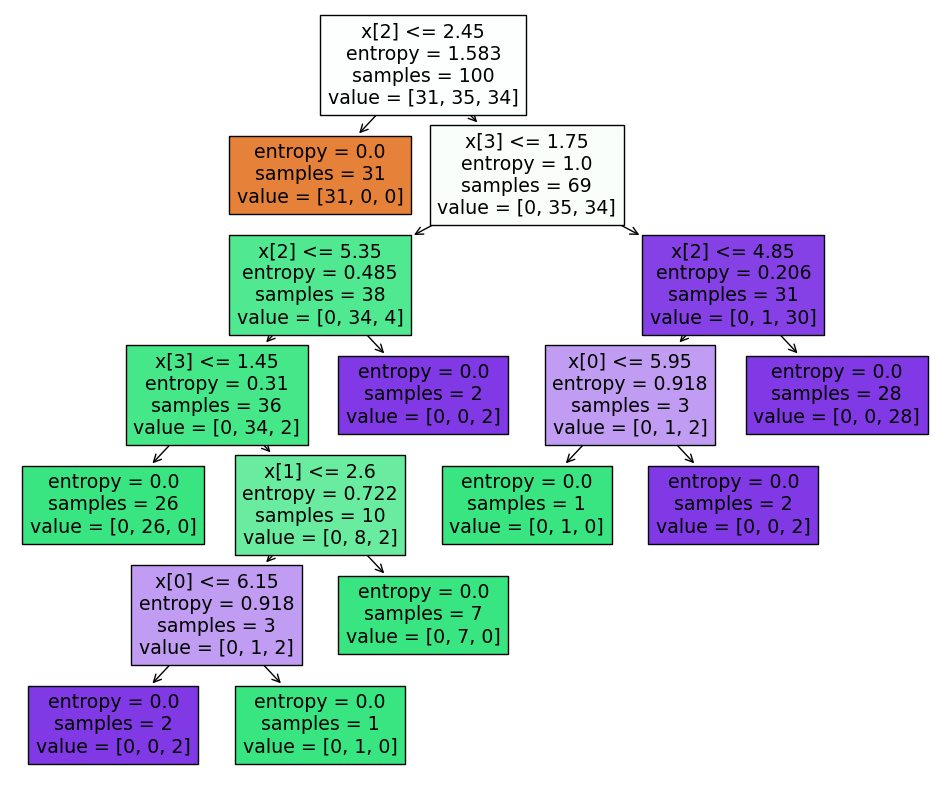

In [16]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier, filled=True)

In [17]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

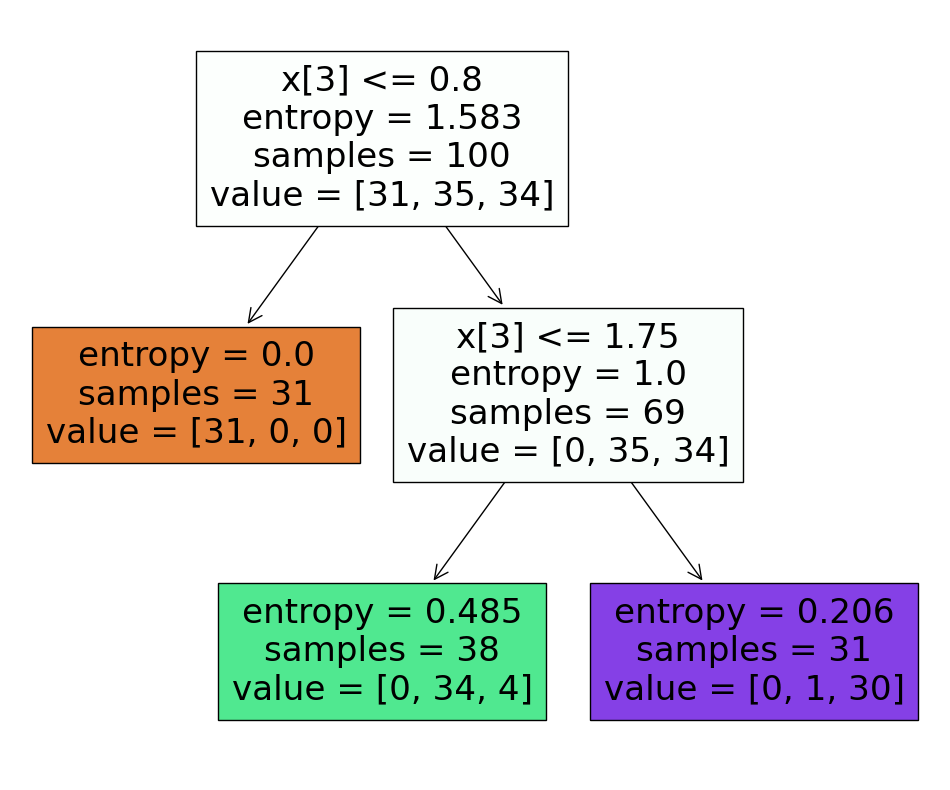

In [18]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier, filled=True)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))

print('--------------------------------------------------------')

print(accuracy_score(y_test, y_pred))

print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
--------------------------------------------------------
0.98
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Decision Tree Prepruning and Hyperparametertuning

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
parameters = {
'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
classifier = DecisionTreeClassifier()

In [28]:
clf = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)

In [29]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [30]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'random'}

In [31]:
y_pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))

print('--------------------------------------------------------')

print(accuracy_score(y_test, y_pred))

print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
--------------------------------------------------------
0.98
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Decision Tree Regressor Implementation

In [33]:
import pandas as pd
import numpy as np
%matplotlib inline

In [37]:
from sklearn.datasets import fetch_california_housing
califoria_df = fetch_california_housing()

In [38]:
print(califoria_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [40]:
df = pd.DataFrame(califoria_df.data, columns=califoria_df.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [41]:
df['target'] = califoria_df.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
df.shape[0]

20640

In [45]:
df = df.sample(frac=0.25)

In [46]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [48]:
X.shape

(5160, 8)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [52]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.5319672138668285


# HyperPARAmeter Tuning

In [53]:
parameters = {
'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [54]:
regressor = DecisionTreeRegressor()

In [60]:
from sklearn.model_selection import GridSearchCV

regressor_cv = GridSearchCV(regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

In [62]:
regressor_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [63]:
regressor_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [64]:
y_pred = regressor_cv.predict(X_test)

In [65]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.6230060449856072

In [70]:
regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features='auto', splitter='best')

In [71]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='auto')

In [72]:
y_pred = regressor.predict(X_test)

In [73]:
score = r2_score(y_test, y_pred)
score

0.6172189473767877

[Text(0.5385869565217392, 0.9285714285714286, 'x[0] <= 5.02\nfriedman_mse = 1.283\nsamples = 3457\nvalue = 2.049'),
 Text(0.2782608695652174, 0.7857142857142857, 'x[0] <= 3.126\nfriedman_mse = 0.792\nsamples = 2712\nvalue = 1.712'),
 Text(0.1391304347826087, 0.6428571428571429, 'x[5] <= 2.034\nfriedman_mse = 0.583\nsamples = 1377\nvalue = 1.37'),
 Text(0.06956521739130435, 0.5, 'x[2] <= 4.203\nfriedman_mse = 1.322\nsamples = 156\nvalue = 2.103'),
 Text(0.034782608695652174, 0.35714285714285715, 'x[7] <= -118.335\nfriedman_mse = 1.305\nsamples = 91\nvalue = 2.494'),
 Text(0.017391304347826087, 0.21428571428571427, 'x[6] <= 37.8\nfriedman_mse = 1.448\nsamples = 58\nvalue = 2.829'),
 Text(0.008695652173913044, 0.07142857142857142, 'friedman_mse = 1.337\nsamples = 41\nvalue = 3.265'),
 Text(0.02608695652173913, 0.07142857142857142, 'friedman_mse = 0.159\nsamples = 17\nvalue = 1.78'),
 Text(0.05217391304347826, 0.21428571428571427, 'x[0] <= 2.383\nfriedman_mse = 0.506\nsamples = 33\nvalue =

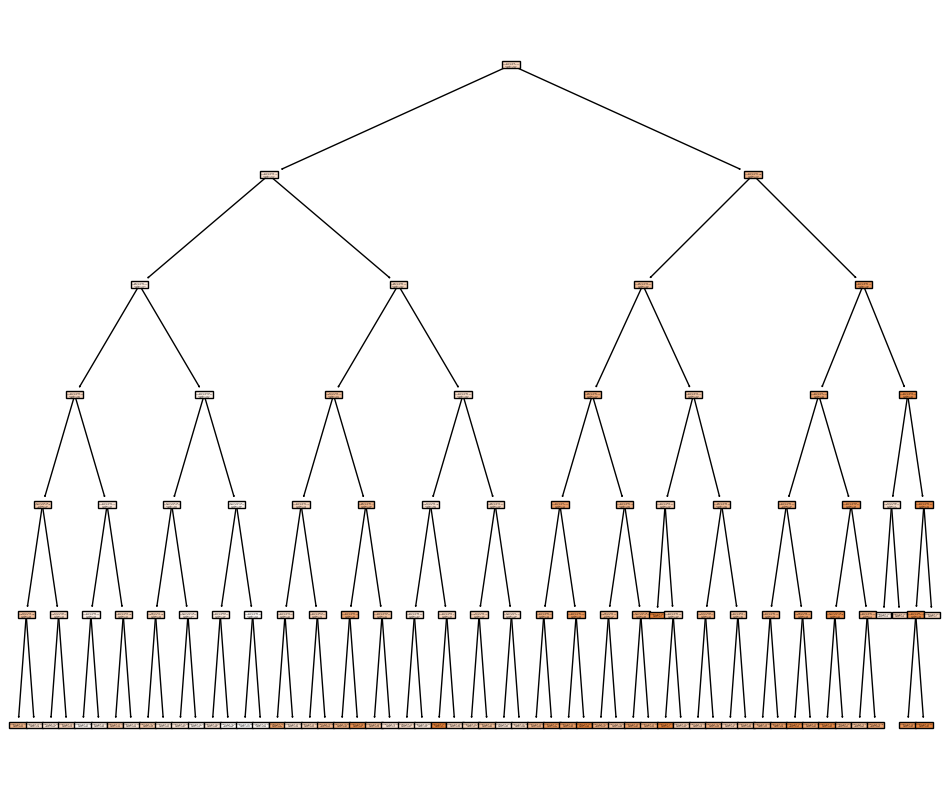

In [74]:
from sklearn import tree

plt.figure(figsize=(12,10))
tree.plot_tree(regressor, filled=True)